# ZOD Camera-LiDAR Fusion Processing

This notebook provides an overview of the combination of camera images with LiDAR point cloud data to create sensor fusion visualizations.

## Fusion Concept
**Camera-LiDAR Fusion**: Overlays 3D LiDAR point clouds onto real camera images, providing both visual context and depth information in a single visualization.

## Key Features

### Data Fusion Process
- **Camera Background**: Real RGB camera image with DNAT anonymization
- **LiDAR Overlay**: 3D point cloud projected onto 2D camera view
- **Temporal Aggregation**: Uses `num_before=1, num_after=1` for richer point density
- **Depth Coloring**: LiDAR points colored by distance from sensor

### Technical Components
- **Calibration**: Camera-LiDAR extrinsic matrices for accurate projection
- **Synchronization**: Timestamp alignment between camera and LiDAR data
- **Projection**: 3D world coordinates → 2D camera pixel coordinates
- **Visualization**: Real-world context with geometric depth information

## Example Fusion Images

Four examples showing camera-LiDAR fusion results:

Looking for fusion images in: ../output/fusion
✅ Loaded: camera_lidar_009158.png
✅ Loaded: camera_lidar_018591.png
✅ Loaded: camera_lidar_062592.png
✅ Loaded: camera_lidar_083430.png


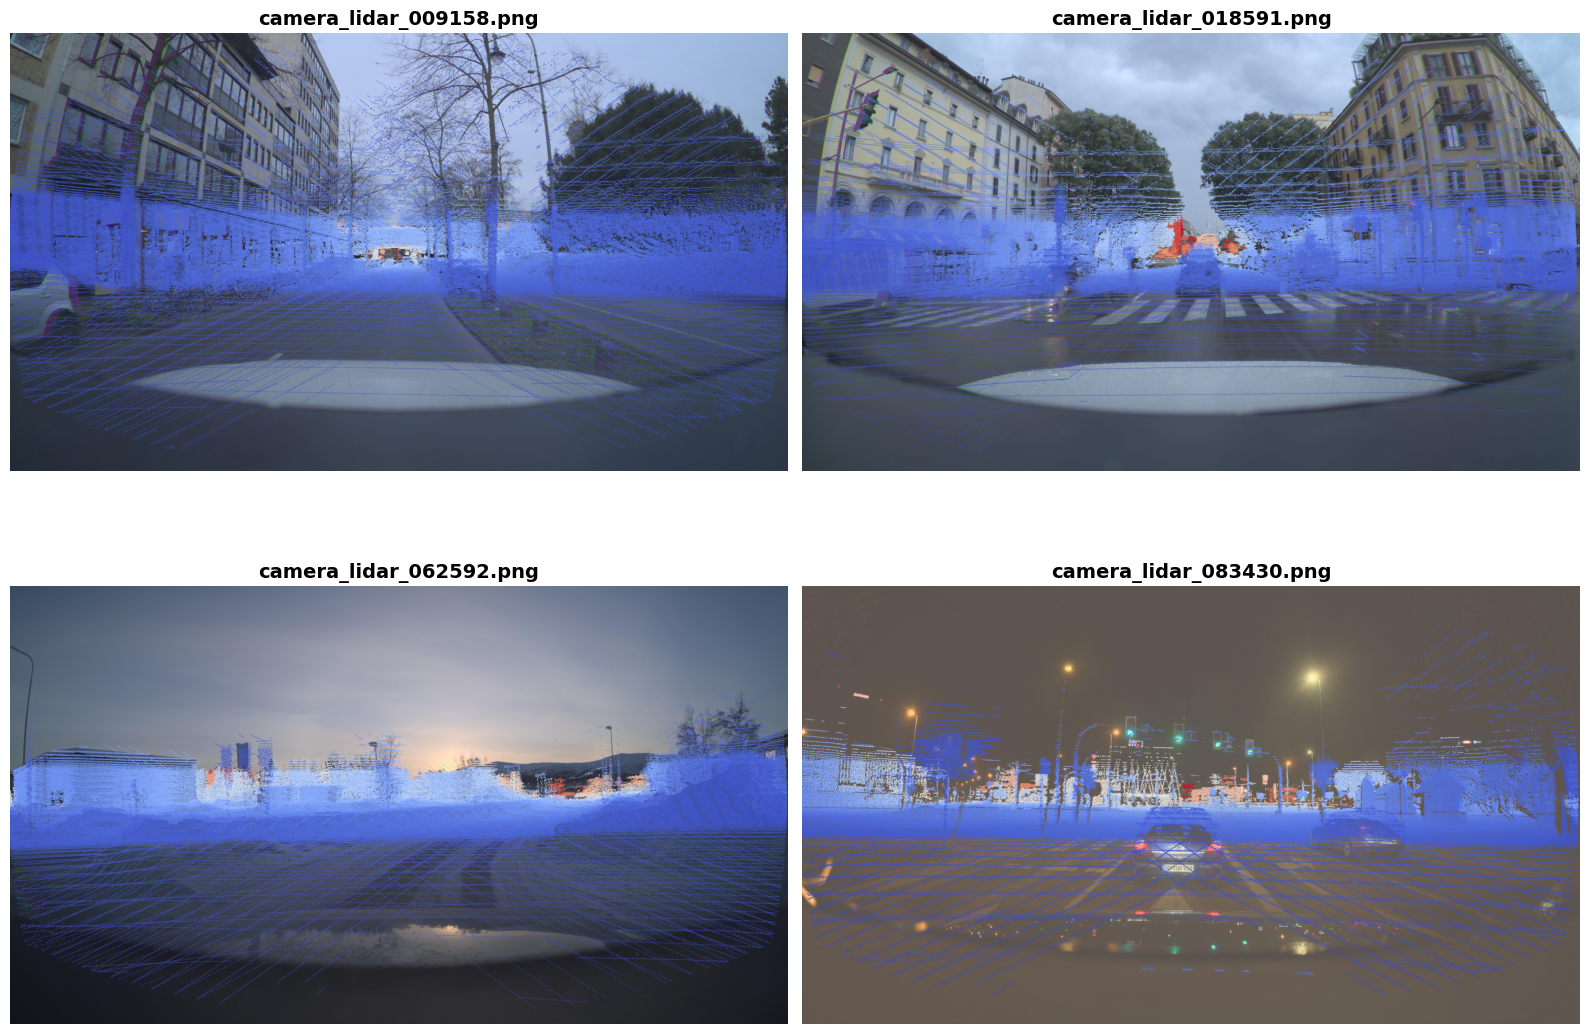

In [1]:
# Import libraries for demonstration
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
from PIL import Image
import os

# Display 4 example fusion images
example_files = [
    "camera_lidar_009158.png",
    "camera_lidar_018591.png", 
    "camera_lidar_062592.png",
    "camera_lidar_083430.png"
]

# Try multiple possible output directories
possible_dirs = ["../output/fusion", "../output/camera_lidar"]
fusion_dir = None

for dir_path in possible_dirs:
    if os.path.exists(dir_path):
        fusion_dir = dir_path
        break

if fusion_dir is None:
    fusion_dir = "../output/fusion"  # Default fallback

print(f"Looking for fusion images in: {fusion_dir}")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, filename in enumerate(example_files):
    filepath = os.path.join(fusion_dir, filename)
    
    if os.path.exists(filepath):
        try:
            # Load and display fusion image
            img = Image.open(filepath)
            axes[i].imshow(img)
            axes[i].set_title(f'{filename}', fontsize=14, fontweight='bold')
            axes[i].axis('off')
            print(f"✅ Loaded: {filename}")
        except Exception as e:
            print(f"❌ Error loading {filename}: {e}")
    else:
        print(f"⚠️ File not found: {filename}")

plt.tight_layout()
plt.show()